In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [24]:
data = pd.read_csv(r'2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

## Exploratory Data Analysis (EDA)

In [25]:
# previewing data
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [26]:
# looking at the table info/contents ; number of entries/rows, columns and data types.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [27]:
# showing the descriptive statistics(record count, mean , std e.t.c) of order_amount and total_items
data[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


,no_of_null
order_id,0
shop_id,0
user_id,0
order_amount,0
total_items,0
payment_method,0
created_at,0


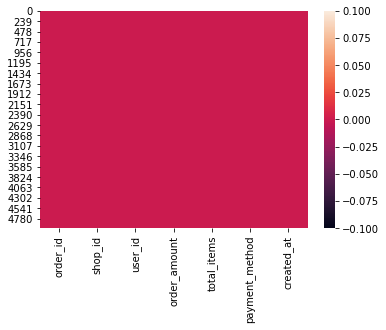

In [28]:
# Checking the data if we have null values (we have no null values as shown below)
sns.heatmap(data.isnull())
no_of_null = data.isnull().sum().to_frame()
no_of_null.columns = ['no_of_null']
no_of_null

## Question 1

### Question 1 a.  what could be going wrong with calculation of  AOV of  $3145.13 and a  better way to evaluate this data

In [29]:
# Calcuated AOV of order directly
data['order_amount'].mean()

3145.128

In [30]:
# we can see that the order_amount is based on a number of total_items sold. 
#So to get the price of each item we divide  order_amount by total_items to get price of each unit of sneakers sold
data.head(3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56


In [31]:
# we create a new column to specify the price for a single sneaker sold for each order.

data['a_sneaker_price'] = data['order_amount'] / data['total_items']

In [32]:
# picking out only relevant data we need as df 

df = data[['shop_id', 'user_id', 'order_amount', 'total_items','a_sneaker_price' ]]

#### Now we calculate the average order value (AOV)  which is (387.7428) as shown below


In [33]:

df['a_sneaker_price'].mean()

387.7428

### Question 1 b What metric would you report for this dataset?

In [34]:
# We would be inspecting the data to see for skewness.
# Mean value might not be the best way to accurately reflect our average order value (AOV) if our data is skewed
# In a situation our data is skewd, we would like to have a better measure of central tendency. 
# As we will find out later, taking the median would be a better measure of central tendency in this situation.

In [35]:
# Let's start looking if order_amount, total_items,a_sneaker_price counts have a normal distribuition

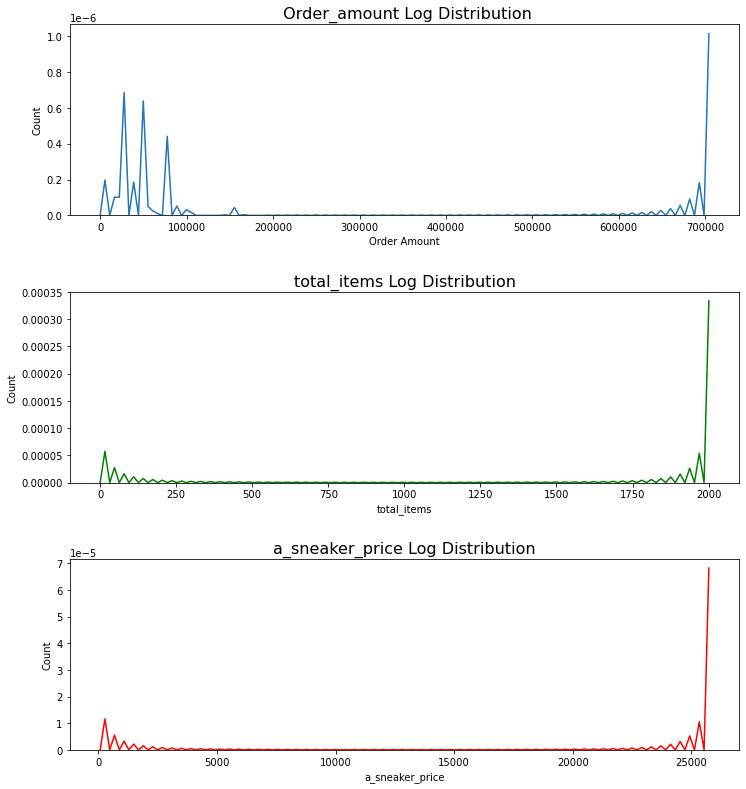

In [58]:


plt.figure(figsize = (12,13))

plt.subplot(311)
g1 = sns.distplot(df['order_amount'], kde=True,  hist=False, bins=20)
g1.set_title(" Order_amount Log Distribution", fontsize=16)
plt.xlabel('Order Amount')
plt.ylabel('Count')

plt.subplot(312)
g2 = sns.distplot(df['total_items'], kde=True, hist=False, bins=20, color='green')
g2.set_title('total_items Log Distribution', fontsize=16)
plt.xlabel('total_items')
plt.ylabel('Count')

plt.subplot(313)
g3 = sns.distplot(df['a_sneaker_price'], kde=True,  hist=False, bins=20 , color='r')
g3.set_title("a_sneaker_price Log Distribution", fontsize=16)
plt.xlabel('a_sneaker_price')
plt.ylabel('Count')


# plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.subplots_adjust(hspace = 0.4, top = 0.9)

plt.show()

In [65]:
#looking at the quantiles distributions of order_amount, total_items,a_sneaker_price
print("order_amount quantiles")
print(df['order_amount'].quantile([.01,.25,.5,.75,.99]))
print("")
print("total_items quantiles")
print(df['total_items'].quantile([.01,.25,.5,.75,.99]))
print("")
print("a_sneaker_price")
print(df['a_sneaker_price'].quantile([.01,.25,.5,.75,.99]))
print("")


order_amount quantiles
0.01      101.0
0.25      163.0
0.50      284.0
0.75      390.0
0.99    25725.0
Name: order_amount, dtype: float64

total_items quantiles
0.01    1.0
0.25    1.0
0.50    2.0
0.75    3.0
0.99    5.0
Name: total_items, dtype: float64

a_sneaker_price
0.01     94.0
0.25    133.0
0.50    153.0
0.75    169.0
0.99    352.0
Name: a_sneaker_price, dtype: float64



In [59]:
# we can see that our dataset for the three columns order_amount, total_items,a_sneaker_price is higly skewed
#taking the median would be a better metric measure in this situation


### Question 1 c.   What is its value ?

#### Now we calculate the average order value (AOV) using median which is a better metrics as shown below

In [70]:
df['a_sneaker_price'].median()

153.0

In [71]:
# another alternative would be to removing the skewed data and recalculating the mean

In [72]:
df.head(1)

,shop_id,user_id,order_amount,total_items,a_sneaker_price
0,53,746,224,2,112.0


In [88]:
df.groupby(df['shop_id'])['a_sneaker_price'].mean().reset_index().sort_values(by=['a_sneaker_price'], ascending = False).head()

,shop_id,a_sneaker_price
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


In [103]:
#  A right-skewed distribution will have the mean to the right of the median as is the case here. mean > median 
#get data with sneaker prices greater than the mean
right_skew = df[(df['a_sneaker_price'] > df['a_sneaker_price'].mean())]
right_skew.head()


,shop_id,user_id,order_amount,total_items,a_sneaker_price
160,78,990,25725,1,25725.0
490,78,936,51450,2,25725.0
493,78,983,51450,2,25725.0
511,78,967,51450,2,25725.0
617,78,760,51450,2,25725.0


In [105]:
#  we see that shop 78 is responsible for our skewed data
right_skew['shop_id'].unique()


array([78])

In [ ]:
#we can see that shop_id 78 sale their sneakers at a
#very high price and is responsible for the skewed price

In [121]:
filtered_data = df[(df['shop_id'] != 78)]

In [122]:
round(filtered_data['a_sneaker_price'].mean(),1)


152.5

### removing the skewed data we see we have a mean of 152.5 which is close to our median. In this case using the median is a good metrics for our report on this dataset